In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker
from matplotlib import rc
from PIL import Image
import seaborn as sns; 
sns.set_style("whitegrid")

#%matplotlib inline

#rc('text', usetex=True)
#rc('axes', linewidth=2)
#rc('font', weight='bold')


In [2]:
_METRICS_FILE = './files/benchmark_sensitivityAnalysis2'
_METRIC = 'kappa'
_CLASSIFIER = 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90'

datasets_to_remove = ['bankmarketingnorm', 'airlinesnorm']
datasets_to_remove += ['breast', 'carnorm', 'covtype', 'electricity', 'higgs200k', 'kddcup99norm', 'ozone', 'pendigitis', 'pokerhand', 'spambase', 'susy100k']
classifiers_to_remove = ['keras_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv', 'MOA_SGD', 'MOA_WeightedMajorityAlgorithm', 'MOA_Perceptron']

In [3]:
datasets_dict = {'TwoPatterns': 1,
 'CinCECGtorso': 2,
 'TwoLeadECG': 3,
 'Wafer': 4,
 'pendigits': 5,
 'FacesUCR': 6,
 'Mallat': 7,
 'FaceAll': 8,
 'Symbols': 9,
 'ItalyPowerDemand': 10,
 'ECG5000': 11,
 'MoteStrain': 12,
 'NonInvasiveFetalECGThorax1': 13,
 'NonInvasiveFetalECGThorax2': 14,
 'SwedishLeaf': 15,
 'FordA': 16,
 'Yoga': 17,
 'UWaveGestureLibraryX': 18,
 'FordB': 19,
 'ElectricDevices': 20,
 'UWaveGestureLibraryY': 21,
 'UWaveGestureLibraryZ': 22,
 'HandOutlines': 23,
 'InsectWingbeatSound': 24,
 'ShapesAll': 25,
 'MedicalImages': 26,
 'PhalangesOutlinesCorrect': 27,
 'ChlorineConcentration': 28,
 'Phoneme': 29}

In [4]:
# read data
metrics = pd.read_csv(_METRICS_FILE+'.csv')

# Delete datasets and classifier that we dont want
metrics = metrics[~metrics.classifier.isin(classifiers_to_remove)]
metrics = metrics[~(metrics.classifier.str.contains('keras') & ~metrics.classifier.str.contains('60x90'))]
metrics = metrics[~metrics.dataset.isin(datasets_to_remove)]
metrics = metrics[metrics.dataset.isin(list(datasets_dict.keys()))]

metrics_table_full = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table_full = metrics_table_full.dropna()
metrics_table_full = metrics_table_full.reindex(metrics_table_full.mean().sort_values(ascending=False).index, axis=1)
metrics_table_full = metrics_table_full.sort_values(by=list(metrics_table_full.columns), ascending=False)
metrics_table_full = metrics_table_full[metrics_table_full.columns[0:]]



metrics = metrics[metrics.classifier.isin(['MOA_ASHoeffdingTree', 'MOA_AdaptiveRandomForest', 'MOA_OzaBoostAdwin', 'MOA_SingleClassifierDrift', 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90', 'sklearn_MLPClassifier', 'sklearn_SGDClassifier', 'MOA_NaiveBayes', 'MOA_LeveragingBag'])]



print(len(metrics.dataset.unique()), "datasets")
metrics.sample(100)

29 datasets


,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time
4914,MedicalImages,MOA_ASHoeffdingTree,1141,99,10,0.516670,0.020496,0.000619,5.656696e-07,0.000619,0.071140,0.000065,0.071205
6486,Phoneme,sklearn_MLPClassifier,2100,1024,39,0.104537,0.029466,0.004934,8.791379e-04,0.005813,1.036087,0.184619,1.220706
2859,FordB,MOA_SingleClassifierDrift,4446,500,2,0.512929,0.046013,0.001365,7.745437e-04,0.002140,0.607644,0.344672,0.952316
8378,UWaveGestureLibraryX,keras_parallel_keras_parallel_3_Dilated_Conv_p...,4388,315,8,0.835584,0.797814,0.141527,8.492373e-02,0.226450,6.934809,4.161263,6.934809
2265,FacesUCR,MOA_SingleClassifierDrift,2250,131,14,0.865498,0.841938,0.000894,8.606107e-04,0.001754,0.201105,0.193637,0.394743
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8705,Wafer,MOA_NaiveBayes,7164,152,2,0.687570,0.193772,0.000177,3.416498e-04,0.000518,0.126565,0.244963,0.371527
7630,Symbols,MOA_OzaBoostAdwin,1020,398,6,0.911894,0.890289,0.021608,1.116758e-02,0.032776,2.204040,1.139093,3.343133
494,CinCECGtorso,MOA_SingleClassifierDrift,1420,1639,4,0.305983,0.237493,0.003669,3.327358e-03,0.006996,0.520996,0.472485,0.993481
5527,MoteStrain,MOA_OzaBoostAdwin,1272,84,2,0.867551,0.716713,0.003311,6.670125e-04,0.003978,0.423756,0.085378,0.509134


In [5]:
print(list(metrics_table_full.columns))
print(list(metrics_table_full.index))

['keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90', 'MOA_AdaptiveRandomForest', 'sklearn_MLPClassifier', 'MOA_NaiveBayes', 'MOA_SingleClassifierDrift', 'MOA_ASHoeffdingTree', 'MOA_HoeffdingTree', 'MOA_HoeffdingOptionTree', 'MOA_RandomHoeffdingTree', 'MOA_LeveragingBag', 'sklearn_BernoulliNB', 'MOA_ActiveClassifier', 'MOA_OzaBoost', 'MOA_OzaBoostAdwin', 'MOA_HoeffdingAdaptiveTree', 'MOA_AdaHoeffdingOptionTree', 'MOA_OzaBagASHT', 'MOA_OzaBag', 'MOA_OzaBagAdwin', 'sklearn_PassiveAggressiveClassifier', 'sklearn_SGDClassifier', 'sklearn_Perceptron', 'MOA_KUE', 'MOA_DecisionStump', 'MOA_OCBoost', 'MOA_MajorityClass', 'MOA_SPegasos']
['TwoPatterns', 'CinCECGtorso', 'TwoLeadECG', 'pendigits', 'FaceAll', 'FacesUCR', 'Mallat', 'Symbols', 'ChlorineConcentration', 'ItalyPowerDemand', 'SwedishLeaf', 'ECG5000', 'MoteStrain', 'Yoga', 'NonInvasiveFetalECGThorax1', 'NonInvasiveFetalECGThorax2', 'UWaveGestureLibraryX', 'ElectricDevices', 'UWaveGestureLibraryY', 'UWaveGestureLibraryZ', 'HandOu

In [6]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
#metrics_table = metrics_table.dropna()
metrics_table = metrics_table.reindex(metrics_table.mean().sort_values(ascending=False).index, axis=1)
metrics_table = metrics_table.sort_values(by=list(metrics_table.columns), ascending=False)
metrics_table = metrics_table[metrics_table.columns[0:]]
limits = (min(metrics_table.min().min()-0.05, -0.1), max(metrics_table.max().max(), 1.0))
print(limits)

metrics_table

(-0.134287334190351, 1.0)


classifier,keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90,MOA_AdaptiveRandomForest,sklearn_MLPClassifier,MOA_NaiveBayes,MOA_SingleClassifierDrift,MOA_ASHoeffdingTree,MOA_LeveragingBag,MOA_OzaBoostAdwin,sklearn_SGDClassifier
dataset,,,,,,,,,
TwoPatterns,0.999982,0.489128,0.831768,0.289709,0.289709,0.289709,0.380146,0.304429,0.614509
CinCECGtorso,0.997410,0.924028,0.981750,0.237493,0.237493,0.233757,0.225028,0.000000,0.221763
Wafer,0.997124,0.981999,0.990666,0.193772,0.191710,0.356147,0.963474,0.959682,0.542139
TwoLeadECG,0.995836,0.762455,0.642916,0.545044,0.545044,0.544061,0.536781,0.857928,0.559434
pendigits,0.986177,0.950034,0.938365,0.824034,0.783898,0.849582,0.867245,0.909211,0.800075
FaceAll,0.977290,0.734995,0.728645,0.829490,0.829490,0.735665,0.849261,0.868891,0.637699
FacesUCR,0.974315,0.656053,0.722795,0.841938,0.841938,0.777421,0.860715,0.873506,0.635126
Mallat,0.969640,0.990102,0.910839,0.931191,0.931191,0.931191,0.204766,0.216491,0.786734
Symbols,0.950480,0.893392,0.830711,0.889887,0.889887,0.888874,0.887084,0.890289,0.709223


In [29]:
metrics_table = metrics_table.reindex(datasets_dict.keys(), axis=0)
metrics_table

classifier,keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90,MOA_AdaptiveRandomForest,sklearn_MLPClassifier,MOA_NaiveBayes,MOA_SingleClassifierDrift,MOA_HoeffdingTree,MOA_ASHoeffdingTree,MOA_OzaBoostAdwin,sklearn_SGDClassifier
dataset,,,,,,,,,
TwoPatterns,0.999982,0.489128,0.831768,0.289709,0.289709,0.289709,0.289709,0.304429,0.614509
CinCECGtorso,0.997410,0.924028,0.981750,0.237493,0.237493,0.233757,0.233757,0.000000,0.221763
TwoLeadECG,0.995836,0.762455,0.642916,0.545044,0.545044,0.544061,0.544061,0.857928,0.559434
Wafer,0.997124,0.981999,0.990666,0.193772,0.191710,0.356147,0.356147,0.959682,0.542139
pendigits,0.986177,0.950034,0.938365,0.824034,0.783898,0.849582,0.849582,0.909211,0.800075
FacesUCR,0.974315,0.656053,0.722795,0.841938,0.841938,0.777421,0.777421,0.873506,0.635126
Mallat,0.969640,0.990102,0.910839,0.931191,0.931191,0.931191,0.931191,0.216491,0.786734
FaceAll,0.977290,0.734995,0.728645,0.829490,0.829490,0.735665,0.735665,0.868891,0.637699
Symbols,0.950480,0.893392,0.830711,0.889887,0.889887,0.888874,0.888874,0.890289,0.709223


In [7]:
metrics_table = metrics_table.reindex(metrics_table.mean().sort_values(ascending=False).index, axis=1)
list(metrics_table.columns)
metrics_table.mean()

classifier
keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90    0.836248
MOA_AdaptiveRandomForest                                      0.598962
sklearn_MLPClassifier                                         0.580412
MOA_NaiveBayes                                                0.496770
MOA_SingleClassifierDrift                                     0.496044
MOA_ASHoeffdingTree                                           0.492707
MOA_LeveragingBag                                             0.468589
MOA_OzaBoostAdwin                                             0.444981
sklearn_SGDClassifier                                         0.400212
dtype: float64

In [8]:
classifiers = list(metrics_table.columns)
classifier_labels = [n.replace('_',' - ') if 'keras' not in n else 'keras - CNN' for n in classifiers]
classifier_labels = "keras CNN, MLP, Single classifier drift, AS Hoeffding tree, Hoeffding tree, Adaptive Random Forest, Oza Boost Adwin, Oza Bag Adwin, SGD".split(", ") 

In [9]:
classifier_labels_full = {
    'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90':'ADLStream',
    'sklearn_MLPClassifier':'MLP',
    'MOA_NaiveBayes':'NB',
    'MOA_SingleClassifierDrift':'SCD',
    'MOA_ASHoeffdingTree':'ASHT',
    'MOA_HoeffdingTree':'HT',
    'MOA_HoeffdingOptionTree':'HOT',
    'MOA_LeveragingBag':'LBAG',
    'MOA_RandomHoeffdingTree':'RHT',
    'MOA_OzaBoostAdwin':'BO-AD',
    'MOA_OzaBoost':'BO',
    'sklearn_BernoulliNB':'BNB',
    'MOA_HoeffdingAdaptiveTree':'HAT',
    'MOA_ActiveClassifier':'AC',
    'MOA_OzaBag':'BA',
    'MOA_AdaHoeffdingOptionTree':'ADHT',
    'MOA_OzaBagAdwin':'BA-AD',
    'MOA_OzaBagASHT':'B-ASHT',
    'sklearn_PassiveAggressiveClassifier':'PAC',
    'sklearn_SGDClassifier':'SGD',
    'sklearn_Perceptron':'P',
    'MOA_DecisionStump':'DST',
    'MOA_OCBoost':'OCBO',
    'MOA_SPegasos':'SPEG',
    'MOA_MajorityClass':'MC',
    'MOA_Perceptron':'P',
    'MOA_AdaptiveRandomForest':'ARF',
    'MOA_KUE':'KUE'
}

[classifier_labels_full[l] for l in metrics_table_full.columns]

abbr_full_ls = [classifier_labels_full[l] for l in metrics_table_full.columns]
abbr_ls = [classifier_labels_full[l] for l in metrics_table.columns]

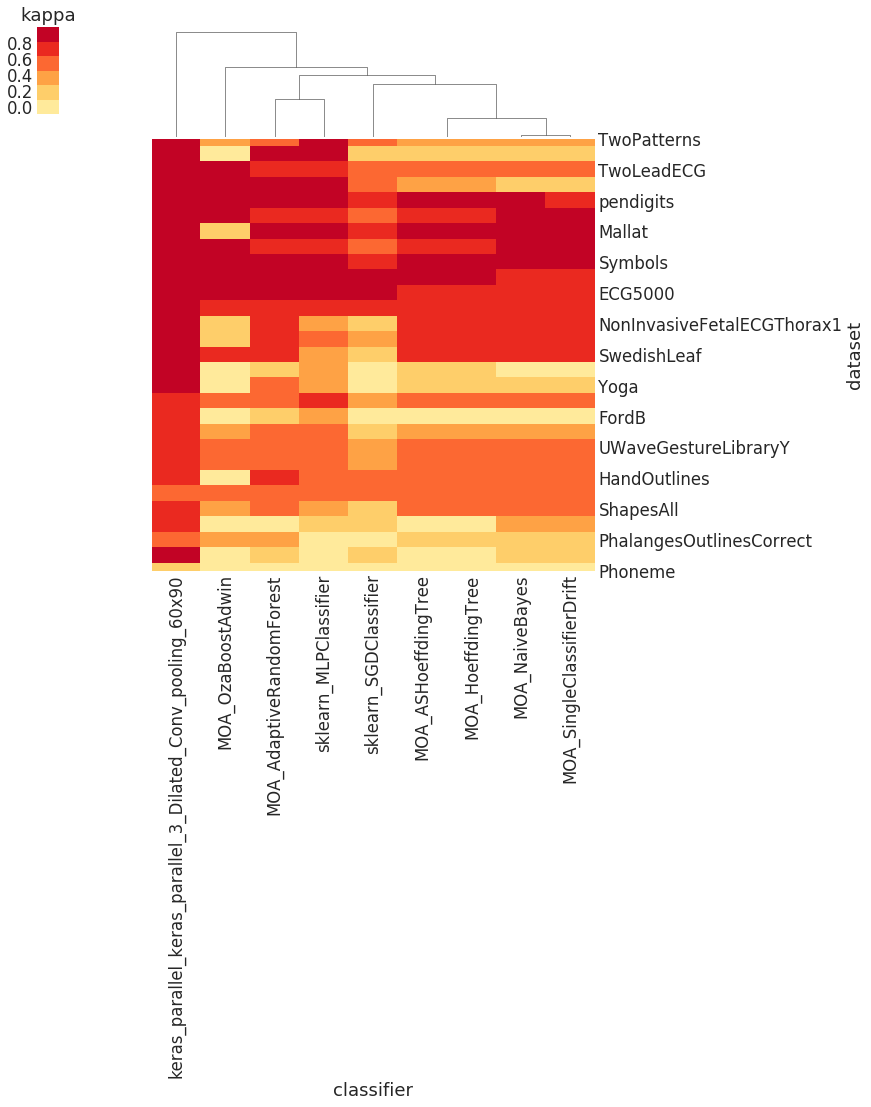

In [33]:
#sns.color_palette("BuGn")
#sns.cm.rocket_r
#sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))
with plt.style.context('seaborn-whitegrid'):
    cm = sns.clustermap(metrics_table, figsize=(10,10), cmap=sns.color_palette("YlOrRd"), annot=False, linewidth=0.0, row_cluster=False)
    cm.cax.yaxis.tick_left()
    cm.cax.yaxis.set_label_position("left")
    #cm.cax.set_visible(False)
    cm.cax.set_title(_METRIC)

29


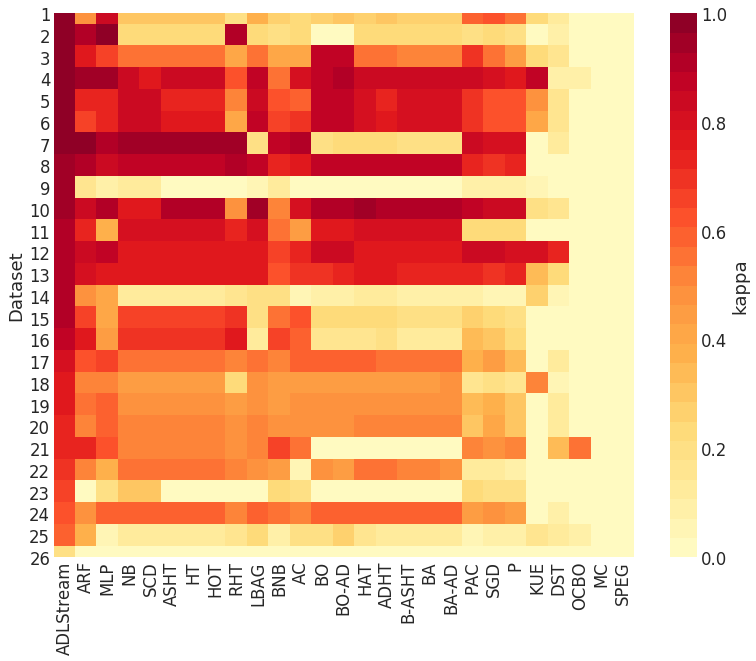

In [10]:
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    fig,ax = plt.subplots(figsize=(13,10))
    sns.heatmap(metrics_table_full, cmap=sns.color_palette("YlOrRd",28), annot=False, linewidth=.0, linecolor='white', ax=ax, cbar_kws={'label': 'kappa'}, vmin=0, vmax=1)
    ax.set_yticklabels(str(i) for i in range(1,len(metrics_table.index)+1))
    ax.set_xticklabels(abbr_full_ls, rotation=90, ha="right", rotation_mode="anchor", verticalalignment='center')
    ax.set_xlabel("")
    ax.set_ylabel("Dataset")
    # ax.collections[0].colorbar.set_ylim(0,1)
    plt.savefig("files/plots/heatmap-kappa.eps", format='eps', bbox_inches='tight')
print(len(metrics_table.index))


In [35]:
np.min(np.min(metrics_table_full))

-0.08428733419035082

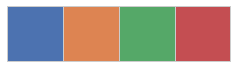

In [11]:
with plt.style.context('seaborn-whitegrid'):
    sns.palplot(sns.color_palette(n_colors=4))
sns.color_palette(n_colors=4)
pal = {True:(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), False:(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)}


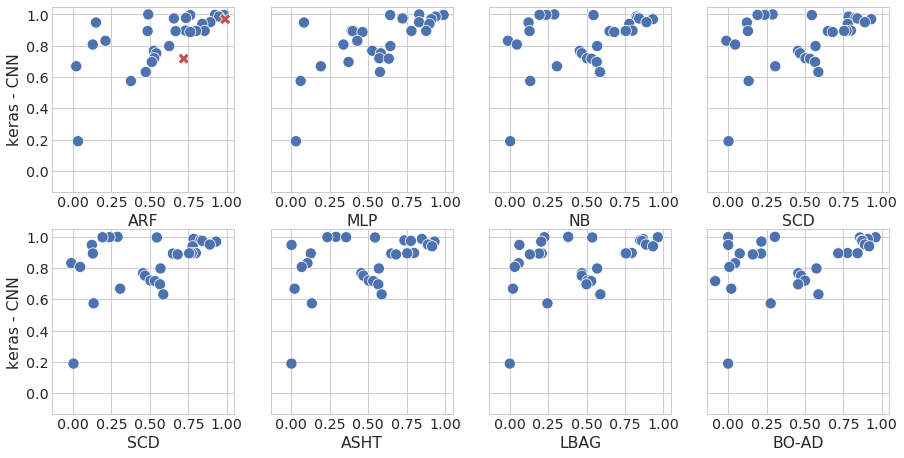

In [12]:
sns.set(font_scale=1.3)

clf_name = 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90'
classifiers = metrics_table.columns[~metrics_table.columns.isin(['keras_parallel_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv_pooling', 'keras_parallel_keras_parallel_3_Dilated_Conv_pooling_60x90'])]
metrics_table['size'] = metrics.pivot(index='dataset', columns = 'classifier', values='instances')[clf_name]

#pal = {True:(0.12156862745098039, 0.4666666666666667, 0.7058823529411765) , False:(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)}
#pal = {True:(0.17254901960784313, 0.6274509803921569, 0.17254901960784313) , False:(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)} 
pal = {True:(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), False:(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)}


with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(2,4, figsize=(15,7.5))

    for i in range(2):
        for j in range(4):

            clf = classifiers[i*3+j]
            metrics_table['diff'] = ((metrics_table[clf_name]-metrics_table[clf])>0)


            #sns.lineplot(x=[-1,2], y=[-1,2], ax=ax[i][j], dashes=True, color='white')
            #ax[i][j].lines[0].set_linestyle("--")
            sns.scatterplot(y=metrics_table[clf_name], x=metrics_table[clf], palette=pal, ax=ax[i][j],hue=metrics_table['diff'], legend=False, style = ~metrics_table['diff'], s=125 )#, size=metrics_table['size'])

            count_ls = [metrics_table[metrics_table['diff']]['diff'].count(),metrics_table[~metrics_table['diff']]['diff'].count()]
            
            #patches, autotexts = ax[i][j].pie(count_ls,labeldistance=0.5, colors = ((*pal[True],0.9),(*pal[False],0.9)), frame=True, center=(0.9,0.0), radius=0.1)
            #autotexts[0].set_color('white')
            #autotexts[1].set_color('white')
            

            ax[i][j].set_ylabel('keras - CNN')
            ax[i][j].set_xlabel(abbr_ls[i*3+j+1])
            ax[i][j].set_xlim(limits[0],limits[1]+0.05)
            ax[i][j].set_ylim(limits[0],limits[1]+0.05)
            if i != 2:
                pass
                #ax[i][j].set_xticklabels([])
            if j != 0:
                ax[i][j].set_ylabel('')
                ax[i][j].set_yticklabels([])

#plt.savefig('files/plots/scatter.png', dpi=fig.dpi)
del metrics_table['size'], metrics_table['diff']         
sns.set(font_scale=1)

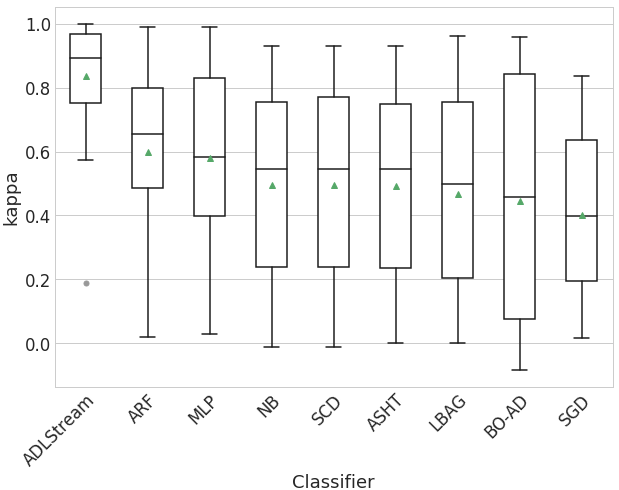

In [13]:
sns.set(font_scale=1.5)
with plt.style.context('seaborn-whitegrid'):
    flierprops = dict(marker='o', markersize=5)
    fig, ax = plt.subplots(figsize=(10,7))
    sns.boxplot(data=metrics_table,  ax=ax, color='white', width=0.5, showmeans=True, flierprops=flierprops)
    #sns.swarmplot(data=metrics_table,  ax=ax)
    ax.set_ylabel('kappa')
    ax.set_xticklabels(abbr_ls, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')
    plt.savefig("files/plots/boxplot.eps", format='eps', bbox_inches='tight')



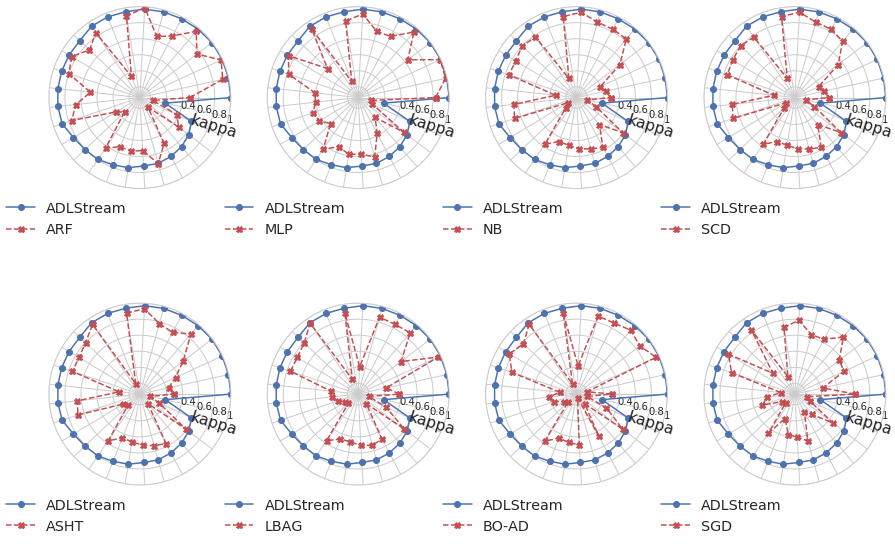

In [14]:
datasets = list(metrics_table.index)
angles=np.linspace(0, 2*np.pi, len(datasets), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

styles = ['o-', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--']

cnn = metrics_table.columns[0]
stats_cnn = metrics_table[cnn].values
stats_cnn = np.concatenate((stats_cnn,[stats_cnn[0]]))


sns.set(font_scale=1.3)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(ncols=4, nrows=2, subplot_kw=dict(polar=True), figsize=(15,10))
    # close the plot
    for i in range(2):
        for j in range(4):
            e = i*4+j+1
            clf = metrics_table.columns[e]
            stats=metrics_table[clf].values
            stats=np.concatenate((stats,[stats[0]]))
            ax[i][j].plot(angles, stats_cnn, 'o-', label=classifier_labels_full[cnn], color=pal[True])
            #ax[i][j].fill(angles, stats_cnn, alpha=0.05,color=pal[True])
            ax[i][j].plot(angles, stats, 'X--', label=classifier_labels_full[clf], color=pal[False])
            #ax[i][j].fill(angles, stats, alpha=0.1, color=pal[False])
            

            ax[i][j].set_thetagrids(angles * 180/np.pi, ['' if i%2==1 else '' for i in range(len(datasets))])
            ax[i][j].set_ylim(limits)
            ax[i][j].set_yticklabels(['' if t<=0.3 else ("{0:.1f}".format(t) if t<1 else '1' ) for i,t in enumerate(list(ax[i][j].get_yticks()))], 
                                     fontsize=10)
            ax[i][j].set_rlabel_position(-17)
            label_position=ax[i][j].get_rlabel_position()
            ax[i][j].text(np.radians(label_position),ax[i][j].get_rmax()/2.,'kappa',
                    rotation=label_position,ha='left',va='top')
    
            #handles, labels = ax[i][j].get_legend_handles_labels()

            ax[i][j].legend(loc='upper right', bbox_to_anchor=(0.5, 0.))    
    #ax.set_title("kappa")
    #ax.grid(True)
    plt.savefig("files/plots/radar.eps", format='eps', bbox_inches='tight')



In [18]:
sns.color_palette(n_colors=4)[2]

(0.3333333333333333, 0.6588235294117647, 0.40784313725490196)

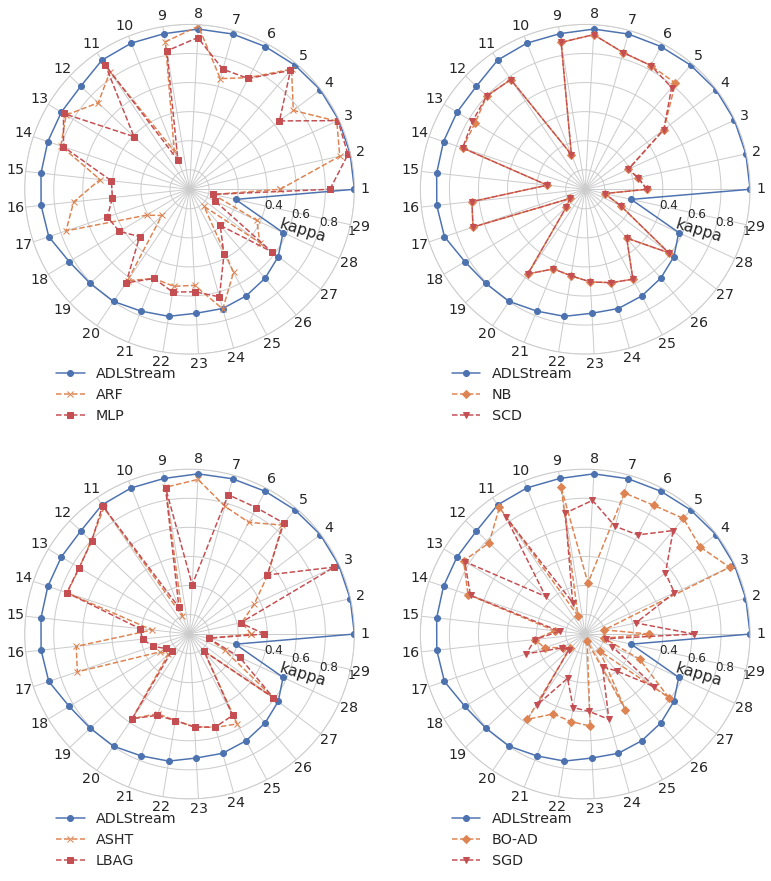

In [15]:
datasets = list(metrics_table.index)
angles=np.linspace(0, 2*np.pi, len(datasets), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

styles = ['o-', 'x--', 's--', 'D--', 'v--', 'x--', 's--', 'D--', 'v--']

cnn = metrics_table.columns[0]
stats_cnn = metrics_table[cnn].values
stats_cnn = np.concatenate((stats_cnn,[stats_cnn[0]]))


sns.set(font_scale=1.3)
with plt.style.context('seaborn-whitegrid'):
    
    fig, ax = plt.subplots(ncols=2, nrows=2, subplot_kw=dict(polar=True), figsize=(13,15))
    
    #ax.fill(angles, stats_cnn, alpha=0.2,color=pal[True])
    for i in range(2):
        for j in range(2):
        
            ax[i][j].plot(angles, stats_cnn, 'o-', label=classifier_labels_full[cnn])
            #ax[i][j].fill(angles, stats_cnn, alpha=0.05)

            for k in range(1,int(len(metrics_table.columns)/4)+1):

                e = 4*i + 2*j +k
                
                if e == len(metrics_table.columns) :
                    break

                clf = metrics_table.columns[e]
                stats=metrics_table[clf].values
                stats=np.concatenate((stats,[stats[0]]))
                #ax.plot(angles, stats_cnn, 'o-', label=classifier_labels[0], color=pal[True])
                #ax.fill(angles, stats_cnn, alpha=0.2,color=pal[True])
                ax[i][j].plot(angles, stats, styles[e], label=classifier_labels_full[clf], color=sns.color_palette(n_colors=5)[k if k == 1 else k+1])
                #ax[i][j].fill(angles, stats, alpha=0.1, color=pal[False])



            #ax.set_
            ax[i][j].set_thetagrids(angles * 180/np.pi, [i if i%2==1 else i for i in range(1,len(datasets)+1)])

            ax[i][j].set_ylim(limits)
            ax[i][j].set_yticklabels(['' if t<=0.3 else ("{0:.1f}".format(t) if t<1 else '1' ) for i,t in enumerate(list(ax[i][j].get_yticks()))], 
                                     fontsize=12)
            ax[i][j].set_rlabel_position(-17)
            label_position=ax[i][j].get_rlabel_position()
            ax[i][j].text(np.radians(label_position),ax[i][j].get_rmax()/2.,'kappa',
                    rotation=label_position,ha='left',va='top')

            handles, labels = ax[i][j].get_legend_handles_labels()

            ax[i][j].legend(loc='upper right', bbox_to_anchor=(0.5, 0.))    
            #ax.set_title("kappa")
            #ax.grid(True)
            
    plt.savefig("files/plots/radar-4.eps", format='eps', bbox_inches='tight')

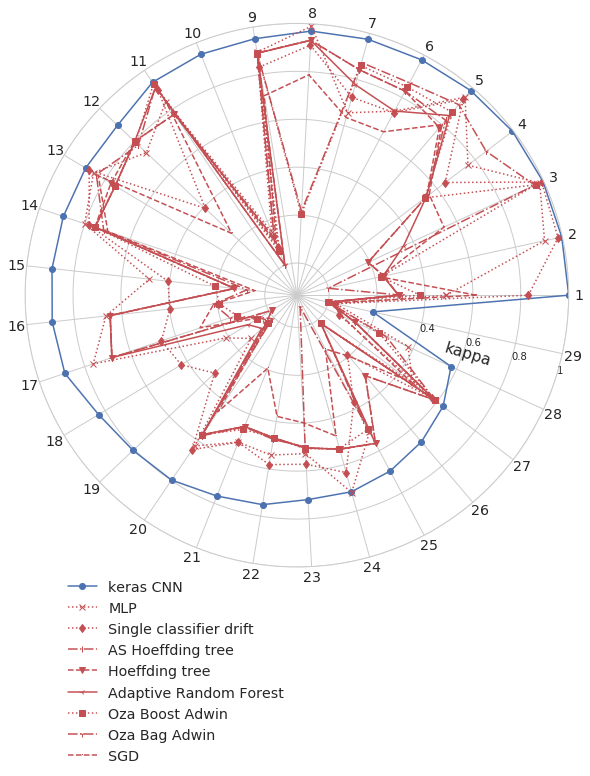

In [16]:
datasets = list(metrics_table.index)
angles=np.linspace(0, 2*np.pi, len(datasets), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

styles = ['o-', 'x:', 'd:', '|-.', 'v--', '3-', 's:', '1-.', ',--', 's-']

cnn = metrics_table.columns[0]
stats_cnn = metrics_table[cnn].values
stats_cnn = np.concatenate((stats_cnn,[stats_cnn[0]]))


sns.set(font_scale=1.3)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(ncols=1, nrows=1, subplot_kw=dict(polar=True), figsize=(10,10))
    
    ax.plot(angles, stats_cnn, 'o-', label=classifier_labels[0], color=pal[True])
    #ax.fill(angles, stats_cnn, alpha=0.2,color=pal[True])
    
    for e in range(1,len(metrics_table.columns)):

        clf = metrics_table.columns[e]
        stats=metrics_table[clf].values
        stats=np.concatenate((stats,[stats[0]]))
        #ax.plot(angles, stats_cnn, 'o-', label=classifier_labels[0], color=pal[True])
        #ax.fill(angles, stats_cnn, alpha=0.2,color=pal[True])
        ax.plot(angles, stats, styles[e], label=classifier_labels[e], color=pal[False])
        #ax.fill(angles, stats, alpha=0.05, color=pal[False])

    #ax.set_
    ax.set_thetagrids(angles * 180/np.pi, [i if i%2==1 else i for i in range(1,len(datasets)+1)])

    ax.set_ylim(limits)
    ax.set_yticklabels(['' if t<=0.3 else ("{0:.1f}".format(t) if t<1 else '1' ) for i,t in enumerate(list(ax.get_yticks()))], 
                             fontsize=10)
    ax.set_rlabel_position(-17)
    label_position=ax.get_rlabel_position()
    ax.text(np.radians(label_position),ax.get_rmax()/2.,'kappa',
            rotation=label_position,ha='left',va='top')

    handles, labels = ax.get_legend_handles_labels()

    ax.legend(loc='upper right', bbox_to_anchor=(0.5, 0.))    
    #ax.set_title("kappa")
    #ax.grid(True)

